In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from numpy.linalg import inv

file_path = "E:\\4K_House_Rent_Dataset.csv"
dataframe = pd.read_csv(file_path)

dataframe.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [21]:
# Drop unnecessary columns to ensure efficiency
dataframe.drop(['Posted On', 'Floor', 'Area Locality', 'City', 'Tenant Preferred', 'Point of Contact'], axis='columns', inplace=True)

dataframe.head()

,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom
0,2,10000,1100,Super Area,Unfurnished,2
1,2,20000,800,Super Area,Semi-Furnished,1
2,2,17000,1000,Super Area,Semi-Furnished,1
3,2,10000,800,Super Area,Unfurnished,1
4,2,7500,850,Carpet Area,Unfurnished,1


In [22]:
dataframe['Area Type'].replace({'Super Area': 0, 'Carpet Area': 1, 'Built Area': 2}, inplace=True)
dataframe['Furnishing Status'].replace({'Unfurnished': 0, 'Semi-Furnished': 1, 'Furnished': 2}, inplace=True)

y = dataframe['Rent']
x = dataframe.drop('Rent', axis='columns')

x.head()


,BHK,Size,Area Type,Furnishing Status,Bathroom
0,2,1100,0,0,2
1,2,800,0,1,1
2,2,1000,0,1,1
3,2,800,0,0,1
4,2,850,1,0,1


In [23]:
x = np.hstack((np.ones((len(dataframe), 1)), x))

def calculateTheta():
    XTX = np.matmul(x.T, x)
    XTY = np.matmul(x.T, y)
    inverse_XTX = inv(XTX)
    theta = np.matmul(inverse_XTX, XTY)
    return theta

theta = calculateTheta()
print("Theta", theta)


Theta [-4.78723430e+04 -2.30749254e+03  2.62171622e+01  2.33881778e+04
  6.42681663e+03  2.34376966e+04]


In [24]:
def predict(X_test):
    x = X_test
    return np.sum(np.multiply(x, theta))

print("Prediction ", predict([1, 3, 1800, 0, 1, 1]))


Prediction  22260.584561240998


In [25]:
def compute_cost(x, y, theta):
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * len(dataframe)) * np.sum(sqrErrors)
    return J

# Calculate the cost
cost = compute_cost(x, y, theta)
print("Cost:", cost)

Cost: 2328402243.394083


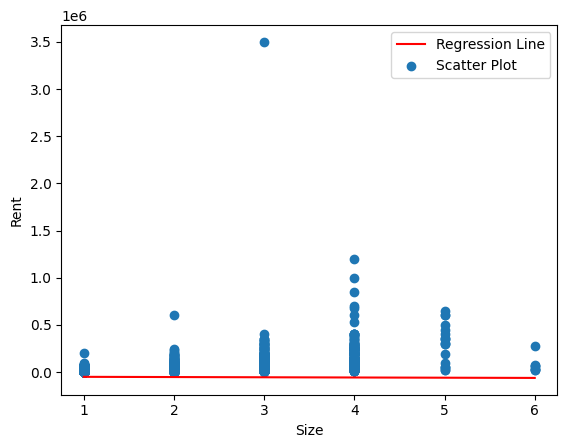

In [27]:
def plot(x, y, label_x, label_y, theta, theta0):
    lin_x = np.linspace(np.min(x), np.max(x), 10)
    reg_line = theta * lin_x + theta0
    plt.plot(lin_x, reg_line, c='r', label='Regression Line')
    plt.scatter(x, y, label='Scatter Plot')
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend()
    plt.show()

# Plotting for each feature
plot(dataframe['BHK'], y, "Size", "Rent", theta[1], theta[0])


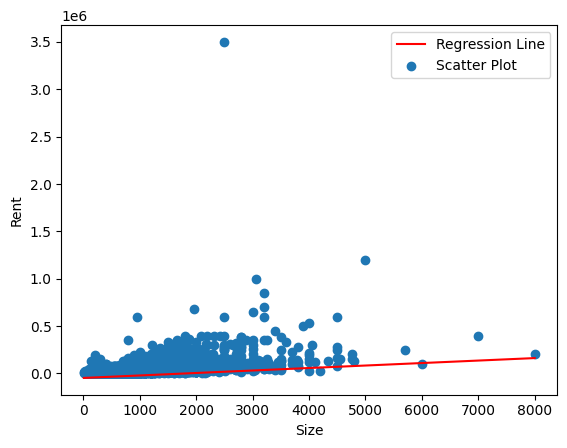

In [28]:
plot(dataframe['Size'], y, "Size", "Rent", theta[2], theta[0])

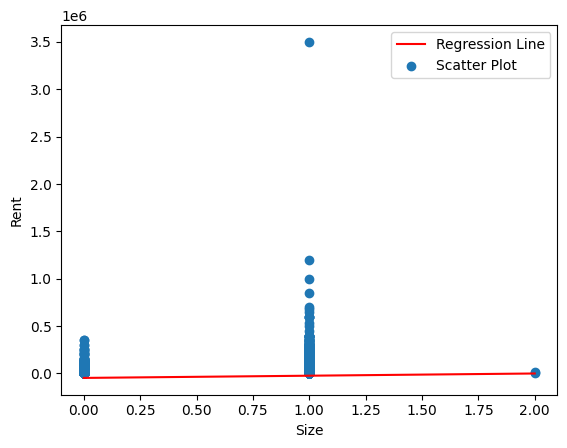

In [29]:
plot(dataframe['Area Type'], y, "Size", "Rent", theta[3], theta[0])

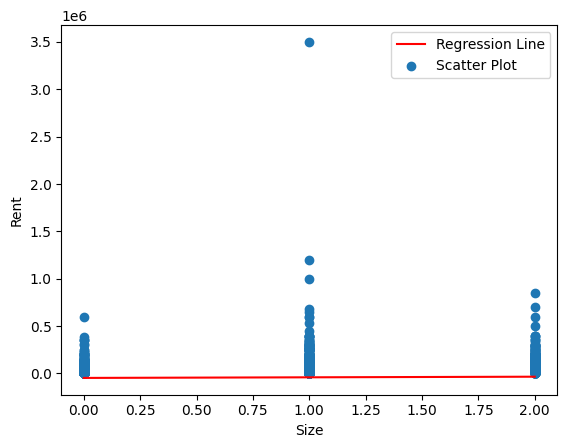

In [30]:
plot(dataframe['Furnishing Status'], y, "Size", "Rent", theta[4], theta[0])

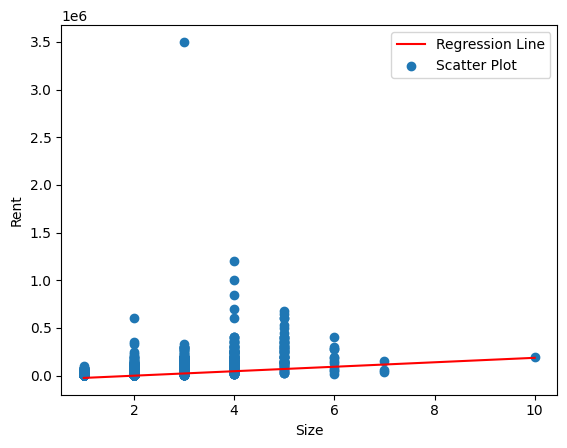

In [31]:
plot(dataframe['Bathroom'], y, "Size", "Rent", theta[5], theta[0])